<a href="https://colab.research.google.com/github/Aishani1234/Telecom-churn-data-analysis/blob/main/Aishani_B_Roy_Telecom_Churn_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Orange S.A., formerly France Télécom S.A., is a French multinational telecommunications corporation. The Orange Telecom's Churn Dataset, consists of cleaned customer activity data (features), along with a churn label specifying whether a customer canceled the subscription.

## <b> Explore and analyze the data to discover key factors responsible for customer churn and come up with ways/recommendations to ensure customer retention. </b>

## **Objetive**
To identify what are the key factors effecting customer churn

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
#Importing package
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
%matplotlib inline                                            
import seaborn as sns  

In [9]:
#Importing dataset
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone projects/EDA - Telecom Churn analysis/Telecom Churn.csv')

## **Analysing Data**

In [11]:
# data exploration
# first 5 rows
df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [12]:
# last 5 rows
df.tail()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
3328,AZ,192,415,No,Yes,36,156.2,77,26.55,215.5,126,18.32,279.1,83,12.56,9.9,6,2.67,2,False
3329,WV,68,415,No,No,0,231.1,57,39.29,153.4,55,13.04,191.3,123,8.61,9.6,4,2.59,3,False
3330,RI,28,510,No,No,0,180.8,109,30.74,288.8,58,24.55,191.9,91,8.64,14.1,6,3.81,2,False
3331,CT,184,510,Yes,No,0,213.8,105,36.35,159.6,84,13.57,139.2,137,6.26,5.0,10,1.35,2,False
3332,TN,74,415,No,Yes,25,234.4,113,39.85,265.9,82,22.60,241.4,77,10.86,13.7,4,3.70,0,False


In [13]:
# to find the total number of rows and columns in the dataset
df.shape

(3333, 20)

In [14]:
# to find column names
df.columns

Index(['State', 'Account length', 'Area code', 'International plan',
       'Voice mail plan', 'Number vmail messages', 'Total day minutes',
       'Total day calls', 'Total day charge', 'Total eve minutes',
       'Total eve calls', 'Total eve charge', 'Total night minutes',
       'Total night calls', 'Total night charge', 'Total intl minutes',
       'Total intl calls', 'Total intl charge', 'Customer service calls',
       'Churn'],
      dtype='object')

In [16]:
# to find data types of columns from the given data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 20 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   State                   3333 non-null   object 
 1   Account length          3333 non-null   int64  
 2   Area code               3333 non-null   int64  
 3   International plan      3333 non-null   object 
 4   Voice mail plan         3333 non-null   object 
 5   Number vmail messages   3333 non-null   int64  
 6   Total day minutes       3333 non-null   float64
 7   Total day calls         3333 non-null   int64  
 8   Total day charge        3333 non-null   float64
 9   Total eve minutes       3333 non-null   float64
 10  Total eve calls         3333 non-null   int64  
 11  Total eve charge        3333 non-null   float64
 12  Total night minutes     3333 non-null   float64
 13  Total night calls       3333 non-null   int64  
 14  Total night charge      3333 non-null   

In [17]:
# descriptive summary of all columns 
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
State,3333,51,WV,106,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Account length,3333.0,NaN,NaN,NaN,101.064806,39.822106,1.0,74.0,101.0,127.0,243.0
Area code,3333.0,NaN,NaN,NaN,437.182418,42.37129,408.0,408.0,415.0,510.0,510.0
International plan,3333,2,No,3010,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Voice mail plan,3333,2,No,2411,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Number vmail messages,3333.0,NaN,NaN,NaN,8.09901,13.688365,0.0,0.0,0.0,20.0,51.0
Total day minutes,3333.0,NaN,NaN,NaN,179.775098,54.467389,0.0,143.7,179.4,216.4,350.8
Total day calls,3333.0,NaN,NaN,NaN,100.435644,20.069084,0.0,87.0,101.0,114.0,165.0
Total day charge,3333.0,NaN,NaN,NaN,30.562307,9.259435,0.0,24.43,30.5,36.79,59.64
Total eve minutes,3333.0,NaN,NaN,NaN,200.980348,50.713844,0.0,166.6,201.4,235.3,363.7


In [18]:
# to check for duplicate columns 
df[df.duplicated()].shape

(0, 20)

In [19]:
#to find the no. of unique values in respective columns
df.nunique()

State                       51
Account length             212
Area code                    3
International plan           2
Voice mail plan              2
Number vmail messages       46
Total day minutes         1667
Total day calls            119
Total day charge          1667
Total eve minutes         1611
Total eve calls            123
Total eve charge          1440
Total night minutes       1591
Total night calls          120
Total night charge         933
Total intl minutes         162
Total intl calls            21
Total intl charge          162
Customer service calls      10
Churn                        2
dtype: int64

In [20]:
#to find list of distinct area codes
list(df['Area code'].unique())

[415, 408, 510]

### Observations:


1.   It is oserved that, there are 3333 non-null values for all columns. Also, row value is 3333, hence it is confirmed that there are no null  values. However a proper and direct method is using isnull method which is followed afterward. 
2.   There are no duplicate data rows in the data.
3.   There are 51 unique values in the states column representing the 50 states of USA and Washington D.C., which is confirmed by refering the area codes, those are, 415- Sanfrancisco, 408-San Jose, CA and the surrounding areas and 510-East Bay cities in Northern California respectively.



## **Data dictionary**

Below is a detailed description of the columns/variables in Telecom churn analysis dataset.

State: Abbreviation of the 50  states in USA and Washingthon D.C \
Account Length: No. of days a/c was active \
Area Code: 3 unique area code of customers \
International plan: If the customer has an international plan \
Voice mail plan: If the customer has an voice mail plan          \
Number vmail messages: number of voice mail messages     \
Total day minutes: total calling minutes used during day         \
Total day calls: total number of calls placed during day          \
Total day charge: total cost of daytime calls         \
Total eve minutes: total calling minutes used during evening         \
Total eve calls: total number of calls placed during evening          \
Total eve charge: total cost of evening calls         \
Total night minutes: total calling minutes used during night       \
Total night calls: total number of calls placed during night        \
Total night charge: total cost of nighttime calls       \
Total intl minutes: total international calling minutes used    \
Total intl calls: total number of international calls placed         \
Total intl charge: total cost of international calls        \
Customer service calls: number of calls to Customer Service   \
Churn: boolean value indicating whether the customer churned i.e. left the service


## **Checking and Handling  of null values**

In [22]:
#conventional approach to check for null values
df.isnull().sum()

State                     0
Account length            0
Area code                 0
International plan        0
Voice mail plan           0
Number vmail messages     0
Total day minutes         0
Total day calls           0
Total day charge          0
Total eve minutes         0
Total eve calls           0
Total eve charge          0
Total night minutes       0
Total night calls         0
Total night charge        0
Total intl minutes        0
Total intl calls          0
Total intl charge         0
Customer service calls    0
Churn                     0
dtype: int64

In [23]:
df.isnull().values.any()

False

### Observations:
The False value implying there are no null values present.

## **Correlation analysis**

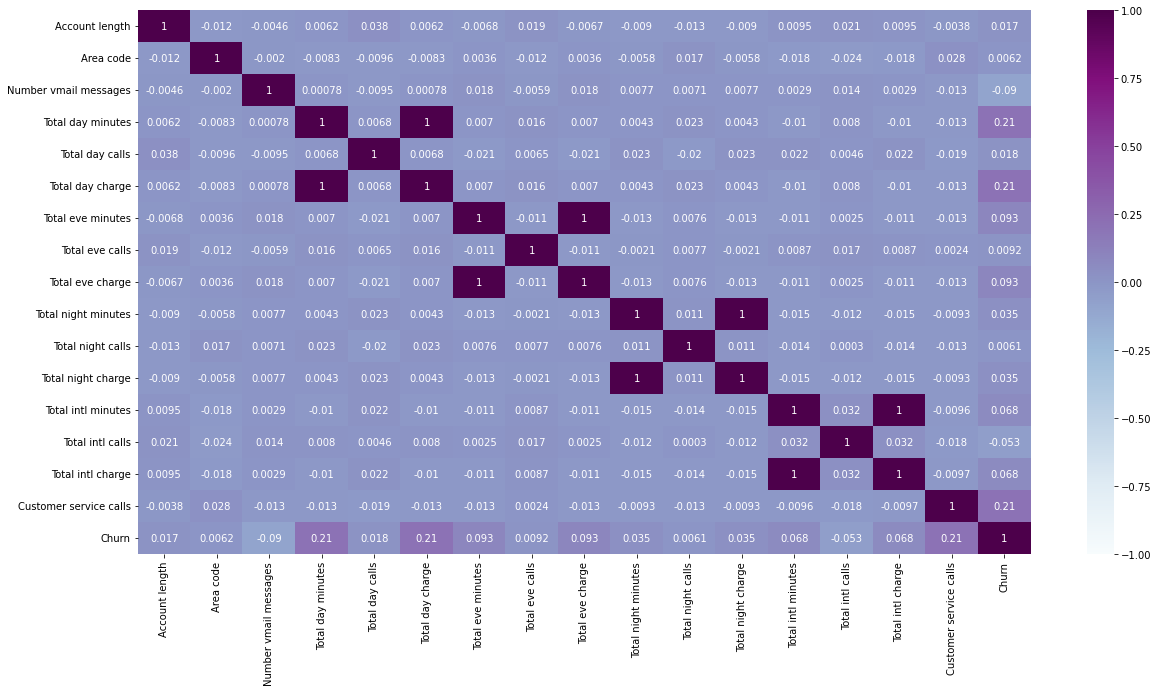

In [24]:
#Visualization of correlations using correlation heatmap
plt.figure(figsize=(20,10))
sns.heatmap(df.corr(), vmin=-1, cmap='BuPu', annot=True)

### Observatins:
It's quite evident from the graph that there is a perfect linear relationship between between call Minutes and its corresponding Charges.(i.e. for international charge with international minutes,for day charges with day minutes, evening charges with evening minutes and finally night charges with night minutes).So, there is a perfect linear correlation between the call minutes respective call charges. Only call minutes are considered for further analysis, since both the variables has same effect on coustomer churn.

## **Visualizations**

In [ ]:
#area code
area_churn_df=pd.crosstab(index=df['Area code'],columns=df['Churn'],normalize="index")
area_churn_df

Churn,False,True
Area code,,
408,0.854415,0.145585
415,0.857402,0.142598
510,0.851190,0.148810


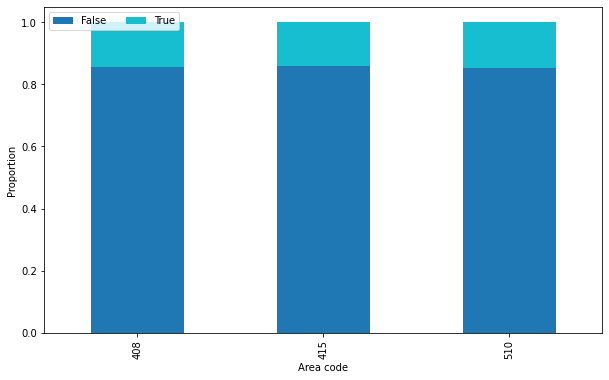

In [ ]:
area_churn_df.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Area code")
plt.ylabel("Proportion")
plt.show()

In [ ]:
# International plan
intpln_churn_df=pd.crosstab(index=df['International plan'],columns=df['Churn'],normalize="index")
intpln_churn_df

Churn,False,True
International plan,,
No,0.885050,0.114950
Yes,0.575851,0.424149


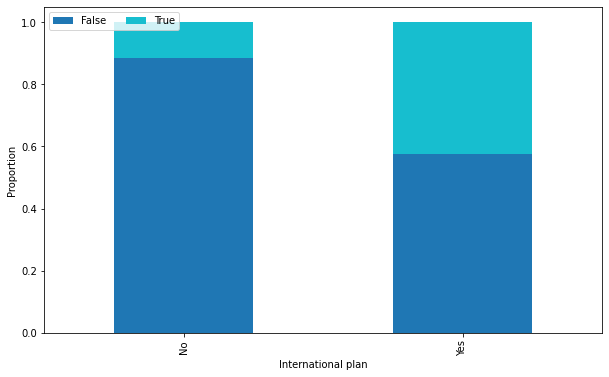

In [ ]:
intpln_churn_df.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("International plan")
plt.ylabel("Proportion")
plt.show()

In [ ]:
#Voice mail plan
vmpln_churn_df=pd.crosstab(index=df['Voice mail plan'],columns=df['Churn'],normalize="index")
vmpln_churn_df

Churn,False,True
Voice mail plan,,
No,0.832849,0.167151
Yes,0.913232,0.086768


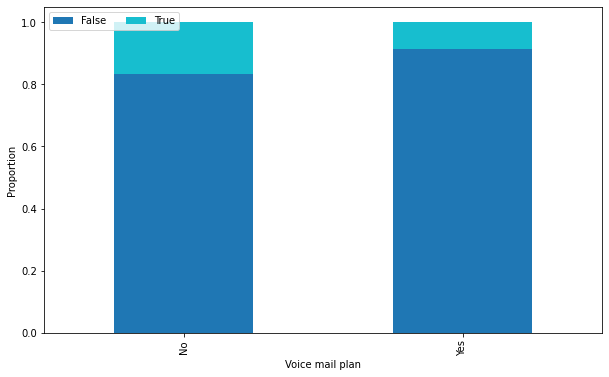

In [ ]:
vmpln_churn_df.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Voice mail plan")
plt.ylabel("Proportion")
plt.show()

In [ ]:
#Number vmail messages
nvm_nonchurn=df['Number vmail messages'].loc[df['Churn']==0].tolist()
nvm_churn=df['Number vmail messages'].loc[df['Churn']==1].tolist()

In [ ]:
import seaborn as sns

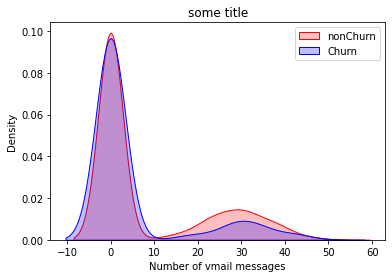

In [ ]:
p1=sns.kdeplot(nvm_nonchurn, shade=True, color="r",label='nonChurn')
p1=sns.kdeplot(nvm_churn, shade=True, color="b",label='Churn')
p1.set(xlabel ="Number of vmail messages", title ='some title')

plt.legend()

In [ ]:
#Account length
acc_nonchurn=df['Account length'].loc[df['Churn']==0].tolist()
acc_churn=df['Account length'].loc[df['Churn']==1].tolist()

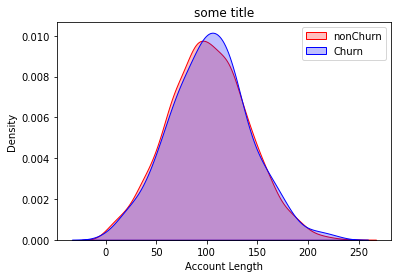

In [ ]:
p2=sns.kdeplot(acc_nonchurn, shade=True, color="r",label='nonChurn')
p2=sns.kdeplot(acc_churn, shade=True, color="b",label='Churn')
p2.set(xlabel ="Account Length", title ='some title')

plt.legend()

In [ ]:
#Customer service calls
cscalls_churn_df=pd.crosstab(index=df['Customer service calls'],columns=df['Churn'],normalize="index")
cscalls_churn_df

Churn,False,True
Customer service calls,,
0,0.868006,0.131994
1,0.896698,0.103302
2,0.885375,0.114625
3,0.897436,0.102564
4,0.542169,0.457831
5,0.393939,0.606061
6,0.363636,0.636364
7,0.444444,0.555556
8,0.500000,0.500000


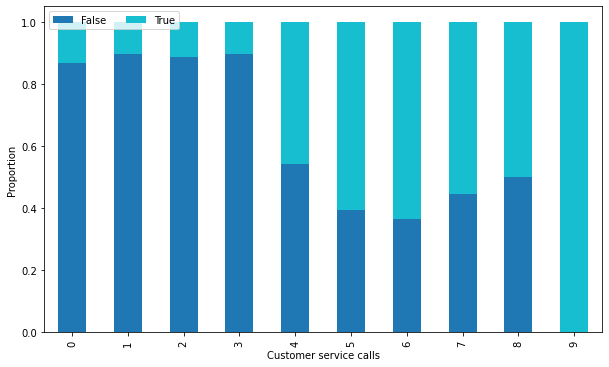

In [ ]:
cscalls_churn_df.plot(kind='bar', 
                    stacked=True, 
                    colormap='tab10', 
                    figsize=(10, 6))

plt.legend(loc="upper left", ncol=2)
plt.xlabel("Customer service calls")
plt.ylabel("Proportion")
plt.show()